<a href="https://colab.research.google.com/github/iveksl2/ds_skills/blob/master/image/biomed_image_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load & Plot

In [ ]:
# Import ImageIO
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage


In [ ]:
imageio.imread('https://assets.datacamp.com/production/repositories/2085/datasets/61bc2353b17eb6929d6169109bff447b6d00b6bc/hand.png')


Array([[17, 17, 20, ..., 34, 36, 36],
       [18, 19, 19, ..., 29, 30, 32],
       [20, 20, 18, ..., 29, 31, 29],
       ...,
       [20, 22, 18, ...,  7,  6, 15],
       [16, 17, 17, ...,  8,  6, 12],
       [26, 14, 17, ...,  6,  5,  8]], dtype=uint8)

In [ ]:
# Import ImageIO
import imageio

# Load "chest-220.dcm"
im = imageio.imread('chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

In [ ]:
# Draw the image with greater contrast
plt.imshow(im, cmap='gray', vmin=-200, vmax=200)
plt.axis('off')

# Render the image
plt.show()

*N*-dimensonal images


Advanced Plotting


In [ ]:
# Import PyPlot
import matplotlib.pyplot as plt

# Initialize figure and axes grid
fig, axes = plt.subplots(nrows=2, ncols=1)

# Draw an image on each subplot
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')


# Remove ticks/labels and render
axes[0].axis('off')
axes[1].axis('off')
plt.show()

In [ ]:
# Plotting image slices with subplot
# Plot the images on a subplots array 
fig, axes = plt.subplots(1, 4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii*40, :, :] # every 40th slice
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

In [ ]:
# Images can have different aspect ratios (width and height)
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()

Masks & Filters

Data type: uint8
Min. value: 3
Max value: 224


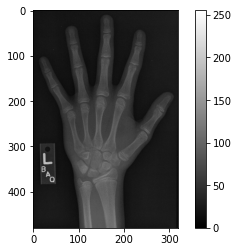

In [ ]:
# Intensities and types

# Load the hand radiograph
#im = imageio.imread('hand-xray.jpg')
im = imageio.imread('https://assets.datacamp.com/production/repositories/2085/datasets/61bc2353b17eb6929d6169109bff447b6d00b6bc/hand.png')

print('Data type:', im.dtype)
print('Min. value:', im.min())
print('Max value:', im.max())

# Plot the grayscale image
plt.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.colorbar()
#format_and_render_plot()

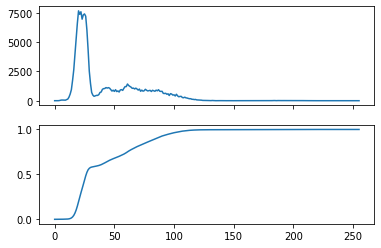

In [ ]:
# histogram and CDF of image intensity values
# Import SciPy's "ndimage" module
import scipy.ndimage as ndi 

# Create a histogram, binned at each possible value
hist = ndi.histogram(im, min=0, max=255, bins=256)

# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Plot the histogram and CDF
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
#format_and_render_plot()

Masks are the primary method for removing or selecting specific parts of an image. They are binary arrays that indicate whether a value should be included in an analysis. Typically, masks are created by applying one or more logical operations to an image.

For this exercise, try to use a simple intensity threshold to differentiate between skin and bone in the hand radiograph. (im has been equalized to utilize the whole intensity range.)

Below is the histogram of im colored by the segments we will plot.

Histogram of equalized foot x-ray

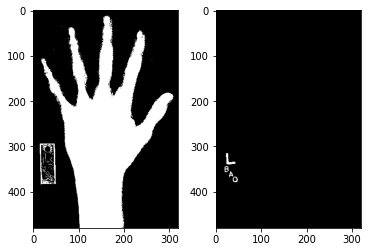

In [ ]:
# Create skin and bone masks
mask_bone = im >= 145
mask_skin = (im >= 45) & (im < 145)

# Plot the skin (0) and bone (1) masks
fig, axes = plt.subplots(1,2)
axes[0].imshow(mask_skin, cmap='gray')
axes[1].imshow(mask_bone, cmap='gray')
#format_and_render_plot()

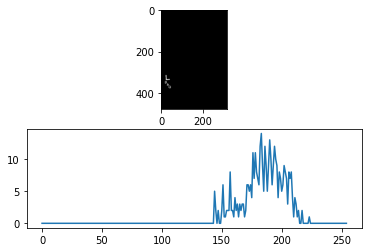

In [ ]:
# Import SciPy's "ndimage" module
import scipy.ndimage

# Screen out non-bone pixels from "im"
mask_bone = im >= 145
im_bone = np.where(mask_bone, im, 0)

# Get the histogram of bone intensities
hist = scipy.ndimage.histogram(im_bone, min=1, max=255, bins=255)

# Plot masked image and histogram
fig, axes = plt.subplots(2,1)
axes[0].imshow(im_bone, cmap='gray')
axes[1].plot(hist)
#format_and_render_plot()

**Tune a mask**

Imperfect masks can be tuned through the addition and subtraction of pixels. SciPy includes several useful methods for accomplishing these ends. These include:

binary_dilation: Add pixels along edges
binary_erosion: Remove pixels along edges
binary_opening: Erode then dilate, "opening" areas near edges
binary_closing: Dilate then erode, "filling in" holes

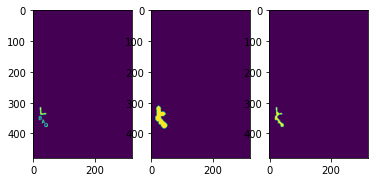

In [ ]:
# Create and tune bone mask
mask_bone = im >= 145
mask_dilate = ndi.binary_dilation(mask_bone, iterations=5)
mask_closed = ndi.binary_closing(mask_bone, iterations=5)

# Plot masked images
fig, axes = plt.subplots(1,3)
axes[0].imshow(mask_bone)
axes[1].imshow(mask_dilate)
axes[2].imshow(mask_closed)
#format_and_render_plot()

**Filters**

Filters are an essential tool in image processing. They allow you to transform images based on intensity values surrounding a pixel, rather than globally.


*Smoothing* - Similar to smoothing in TS. 

*Sharpening* - exageratoes differences

Kernel - Weighting function matrix of pixel and its neighbors. 

[How Blurs & Filters Work - Computerphile](https://www.youtube.com/watch?v=C_zFhWdM4ic)

In [ ]:
# Set filter weights
weights = [[0.11, 0.11, 0.11],
           [0.11, 0.11, 0.11], 
           [0.11, 0.11, 0.11]]

# Convolve the image with the filter
im_filt = ndi.convolve(im, weights)

# Plot the images
fig, axes = plt.subplots(1,2)
axes[0].imshow(im)
axes[1].imshow(im_filt)
format_and_render_plot()

Convolutions rely on a set of weights, but filtering can also be done using functions such as the mean, median and maximum. Just like with convolutions, filter functions will update each pixel value based on its local neighborhood.

Smoothing can improve the signal-to-noise ratio of your image by blurring out small variations in intensity. The Gaussian filter is excellent for this: it is a circular (or spherical) smoothing kernel that weights nearby pixels higher than distant ones.



The width of the distribution is controlled by the sigma argument, with higher values leading to larger smoothing effects.

In [ ]:
# Smooth "im" with Gaussian filters
im_s1 = ndi.gaussian_filter(im, sigma=1)
im_s3 = ndi.gaussian_filter(im, sigma=3)

# Draw bone masks of each image
fig, axes = plt.subplots(1,3)
axes[0].imshow(im >= 145)
axes[1].imshow(im_s1 >= 145)
axes[2].imshow(im_s3 >= 145)
format_and_render_plot()

Feature Detection 

Filters can also be used as "detectors." If a part of the image fits the weighting pattern, the returned value will be very high (or very low).

In the case of edge detection, that pattern is a change in intensity along a plane. A filter detecting horizontal edges might look like this:

weights = [[+1, +1, +1],
           [ 0,  0,  0],
           [-1, -1, -1]]

In [ ]:
# Set weights to detect vertical edges
weights = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]

# Convolve "im" with filter weights
edges = ndi.convolve(im, weights)

# Draw the image in color
plt.imshow(edges, cmap='seismic', vmin=-150, vmax=150)
plt.colorbar()
format_and_render_plot()

Edge detection can be performed along multiple axes, then combined into a single edge value. For 2D images, the horizontal and vertical "edge maps" can be combined using the Pythagorean theorem:


One popular edge detector is the Sobel filter. The Sobel filter provides extra weight to the center pixels of the detector:

weights = [[ 1,  2,  1], 
           [ 0,  0,  0],
           [-1, -2, -1]]

In [ ]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(im, axis=0)
sobel_ax1 = ndi.sobel(im, axis=1)

# Calculate edge magnitude 
edges = np.sqrt(np.square(sobel_ax0) + np.square(sobel_ax1))

# Plot edge magnitude
plt.imshow(edges, cmap='gray', vmax=75)
format_and_render_plot()

**Objects and Labels**

In [ ]:
# Smooth intensity values
im_filt = ndi.median_filter(im, size=3)

# Select high-intensity pixels
mask_start = np.where(im_filt > 60, 1, 0)
mask = ndi.binary_closing(mask_start)``

# Label the objects in "mask"
labels, nlabels = ndi.label(mask)
print('Num. Labels:', nlabels)

In [ ]:
# Create a `labels` overlay
overlay = np.where(labels > 0, labels, np.nan)

# Use imshow to plot the overlay
plt.imshow(overlay, cmap='rainbow', alpha=.75)
format_and_render_plot()

In [ ]:
# Label the image "mask"
labels, nlabels = ndi.label(mask)

# Select left ventricle pixels
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, np.nan)

# Overlay selected label
plt.imshow(lv_mask, cmap='rainbow')
plt.show()

In [ ]:
# Create left ventricle mask
labels, nlabels = ndi.label(mask)
lv_val = labels[128, 128]
lv_mask = np.where(labels == lv_val, 1, 0)

# Find bounding box of left ventricle
bboxes = ndi.find_objects(lv_mask)
print('Number of objects:', len(bboxes))
print('Indices for first box:', bboxes[0])

# Crop to the left ventricle (index 0)
im_lv = im[bboxes[0]]

# Plot the cropped image
plt.imshow(im_lv)
format_and_render_plot()

SciPy measurement functions allow you to tailor measurements to specific sets of pixels:

* Specifying labels restricts the mask to non-zero pixels.
* Specifying index value(s) returns a measure for each label value.

In [ ]:
# Variance for all pixels
var_all = ndi.variance(vol)
print('All pixels:', var_all)

# Variance for labeled pixels
var_label`s = ndi.variance(vol, labels)
print('Labeled pixels:', var_labels)

# Variance for each object
var_objects = ndi.variance(vol, labels, index=[1,2])
print('Left ventricle:', var_objects[0])
print('Other tissue:', var_objects[1])

Separate histograms

A poor tissue segmentation includes multiple tissue types, leading to a wide distribution of intensity values and more variance.

On the other hand, a perfectly segmented left ventricle would contain only blood-related pixels, so the histogram of the segmented values should be roughly bell-shaped.



In [ ]:
# Create histograms for selected pixels
hist1 = ndi.histogram(vol, min=0, max=255, bins=256)
hist2 = ndi.histogram(vol, 0, 255, 256, labels=labels)
hist3 = ndi.histogram(vol, 0, 255, 256, labels=labels, index=1)

# Plot the histogram density
plt.plot(hist1 / hist1.sum(), label='All pixels')
plt.plot(hist2 / hist2.sum(), label='All labeled pixels')
plt.plot(hist3 / hist3.sum(), label='Left ventricle')
format_and_render_plot()

Mophology (shape & size)

I.E. How big is a brain tumor. 

Calculate volume
Quantifying tissue morphology, or shape is one primary objective of biomedical imaging. The size, shape, and uniformity of a tissue can reveal essential health insights.

A distance transformation calculates the distance from each pixel to a given point, usually the nearest background pixel. This allows you to determine which points in the object are more interior and which are closer to edges.

In [ ]:
# Calculate left ventricle distances
lv = np.where(labels==1, 1, 0)
dists = ndi.distance_transform_edt(lv, sampling=vol.meta['sampling'])

# Report on distances
print('Max distance (mm):', dists.max())
print('Max location:', ndi.maximum_position(dists))

# Plot overlay of distances
overlay = np.where(dists[5] > 0, dists[5], np.nan) 
plt.imshow(overlay, cmap='hot')
format_and_render_plot()

The distance transformation reveals the most embedded portions of an object. On the other hand, ndi.center_of_mass() returns the coordinates for the center of an object.

The "mass" corresponds to intensity values, with higher values pulling the center closer to it.

In [ ]:
# Extract centers of mass for objects 1 and 2
coms = ndi.center_of_mass(vol, labels, index=[1,2])
print('Label 1 center:', coms[0])
print('Label 2 center:', coms[1])

# Add marks to plot
for c0, c1, c2 in coms:
    plt.scatter(c2, c1, s=100, marker='o')
plt.show()

Summarize the time series

The ejection fraction is the proportion of blood squeezed out of the left ventricle each heartbeat. To calculate it, radiologists have to identify the maximum volume (systolic volume) and the minimum volume (diastolic volume) of the ventricle.

In [ ]:
# Create an empty time series
ts = np.zeros(20)

# Calculate volume at each voxel
d0, d1, d2, d3 = vol_ts.meta['sampling']
dvoxel = d1 * d2 * d3

# Loop over the labeled arrays
for t in range(20):
    nvoxels = ndi.sum(1, labels[t], index=1)
    ts[t] = nvoxels * dvoxel

# Plot the data
plt.plot(ts)
format_and_render_plot()

Measure ejection fraction
The ejection fraction is defined as:

 
…where  is left ventricle volume for one 3D timepoint.

To close our investigation, plot slices from the maximum and minimum volumes by analyzing the volume time series (ts). Then, calculate the ejection fraction.

In [ ]:
# Get index of max and min volumes
tmax = np.argmax(ts)
tmin = np.argmin(ts)

# Plot the largest and smallest volumes
fig, axes = plt.subplots(2,1)
axes[0].imshow(vol_ts[tmax, 4], vmax=160)
axes[1].imshow(vol_ts[tmin, 4], vmax=160)
format_and_render_plots()

In [ ]:
# Calculate ejection fraction
ej_vol = ts.max() - ts.min()
ej_frac = ej_vol / ts.max()
print('Est. ejection volume (mm^3):', ej_vol)
print('Est. ejection fraction:', ej_frac)

**Image Comparison**

In [ ]:
# Translation
# Find image center of mass
com = ndi.center_of_mass(im)

# Calculate amount of shift needed
d0 = 128 - com[0]
d1 = 128 - com[1]

# Translate the brain towards the center
xfm = ndi.shift(im, shift=(d0, d1))

# Plot the original and adjusted images
fig, axes = plt.subplots(nrows=2,ncols=1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

Rotations

In cases where an object is angled or flipped, the image can be rotated. Using ndi.rotate(), the image is rotated from its center by the specified degrees from the right horizontal axis.

In [ ]:
# Shift the image towards the center
xfm = ndi.shift(im, shift=(-20, -20))

# Rotate the shifted image
xfm = ndi.rotate(xfm, angle=-30, reshape=False)

# Plot the original and rotated images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im)
axes[1].imshow(xfm)
format_and_render_plot()

Affine transform

An affine transformation matrix provides directions for up to four types of changes: translating, rotating, rescaling and shearing. The elements of the matrix map the coordinates from the input array to the output.


In [ ]:
np.arange(100).reshape([10,10])

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

Resampling

Images can be collected in a variety of shapes and sizes. Resampling is a useful tool when these shapes need to be made consistent. Two common applications are:

  * Downsampling: combining pixel data to decrease size
  * Upsampling: distributing pixel data to increase size

note: Tradeoff in memory & storage
Can create a higher resolution through interpolation. Higher order interpolation will increase computation time


In [ ]:
# Center and level image
xfm = ndi.shift(im, shift=[-20,-20])
xfm = ndi.rotate(xfm, angle=-35, reshape=False)

# Resample image
im_dn = ndi.zoom(xfm, zoom=.25)
im_up = ndi.zoom(xfm, zoom=4)

# Plot the images
fig, axes = plt.subplots(2, 1)
axes[0].imshow(im_dn)
axes[1].imshow(im_up)
format_and_render_plot()

In [ ]:
# Upsample "im" by a factor of 4
up0 = ndi.zoom(im, zoom=4, order=0)
up5 = ndi.zoom(im, zoom=4, order=5)

# Print original and new shape
print('Original shape:', im.shape)
print('Upsampled shape:', up5.shape)

# Plot close-ups of the new images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256])
axes[1].imshow(up5[128:256, 128:256])
format_and_render_plots()

Comparing Images

Can look at differences of images and take mean to condnense into 1 number. Intensity can amplify the difference

The mean absolute error (MAE), for example, summarizes intensity differences between two images, with higher values indicating greater divergence.



In [ ]:
# Calculate image difference
err = im1 - im2

# Plot the difference
plt.imshow(err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

In [ ]:
# Calculate absolute image difference
abs_err = np.abs(im1 - im2)

# Plot the difference
plt.imshow(abs_err, cmap='seismic', vmin=-200, vmax=200)
format_and_render_plot()

In [ ]:
# Calculate mean absolute error
mean_abs_err = np.mean(np.abs(im1 - im2))
print('MAE:', mean_abs_err)

Intersection of the union

Another cost function is the intersection of the union (IOU). The IOU is the number of pixels filled in both images (the intersection) out of the number of pixels filled in either image (the union).

For this exercise, determine how best to transform im1 to maximize the IOU cost function with im2. We have defined the following function for you:

```
def intersection_of_union(im1, im2):
    i = np.logical_and(im1, im2)
    u = np.logical_or(im1, im2)
    return i.sum() / u.sum()

```

Note: When using ndi.rotate(), remember to pass reshape=False, so that array shapes match.

Normalizing Measurements


Let's test the hypothesis that Alzheimer's Disease is characterized by reduced brain volume.

Sample Segmentations of Alzheimer's and Typical Subject

We can perform a two-sample t-test between the brain volumes of elderly adults with and without Alzheimer's Disease. In this case, the two population samples are independent from each other because they are all separate subjects.

In [ ]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Select data from "alzheimers" and "typical" groups
brain_alz = df.loc[df.alzheimers == True, 'brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'brain_vol']

# Perform t-test of "alz" > "typ"
results = ttest_ind(brain_alz, brain_typ)
print('t = ', results.statistic)
print('p = ', results.pvalue)

# Show boxplot of brain_vol differences
df.boxplot(column='brain_vol', by='alzheimers')
plt.show()

In [ ]:
# Import independent two-sample t-test
from scipy.stats import ttest_ind

# Adjust `brain_vol` by `skull_vol`
df['adj_brain_vol'] = df.brain_vol / df.skull_vol

# Select brain measures by group
brain_alz = df.loc[df.alzheimers == True, 'adj_brain_vol']
brain_typ = df.loc[df.alzheimers == False, 'adj_brain_vol']

# Evaluate null hypothesis
results = ttest_ind(brain_alz, brain_typ)

